In this project, we examine the hotel booking dataset to identify patterns and trends that influence customer behavior. After processing the data to ensure its quality and usability, we apply several classification algorithms, including a Random Forest Classifier, to predict customer booking outcomes and cancellations. The metrics achieved provide a solid foundation for future improvements aimed at enhancing customer satisfaction and optimizing booking strategies. The goal of this analysis is to generate valuable insights for hotel management and to facilitate data-driven decision-making

# **Hotel Booking Anaylse**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('hotel_booking.csv')

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [ ]:
# Aslinda burda 'Hotel Name' degil de diger gereksizleri cikmak lazimdi e-mail gibi vs. ama ilk asamada böyle olmus suan tekrar karistirmak istemiyom, aksi halde tam bozabilirim. Ögrenmem icin deney oldu.
 df = df.drop(columns=['hotel'])

In [ ]:
# EDA

In [ ]:
df.shape

(119390, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [ ]:
df.isnull().sum()

,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4


In [ ]:
# Fehlende Werte füllen
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

df['name'] = df['name'].fillna(0)
df['email'] = df['email'].fillna(0)
df['phone-number'] = df['phone-number'].fillna(0)
df['credit_card'] = df['credit_card'].fillna('Unknown')  # Hier kannst du auch 0 verwenden, wenn gewünscht

#Das Ersetzen durch 'Unknown' kann bei Analysen, die kategorische Variablen berücksichtigen, nützliche Informationen liefern
#Bei Modellen kann es wichtig sein, diese Werte zu unterscheiden, um zu lernen, wie oft Daten fehlen, was nützlich für bestimmte Vorhersagen sein kann

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

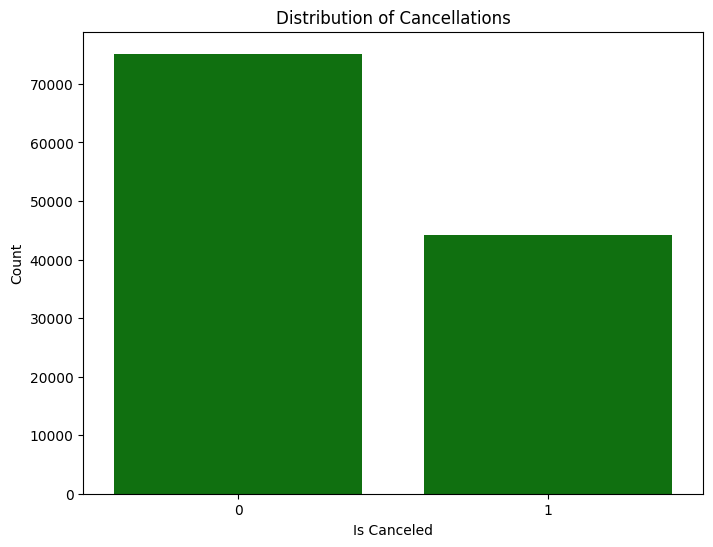

In [ ]:
# die Verteilung der Stornierungen grafisch darstellen
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', data=df, color='green')
plt.title('Distribution of Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Count')
plt.show()

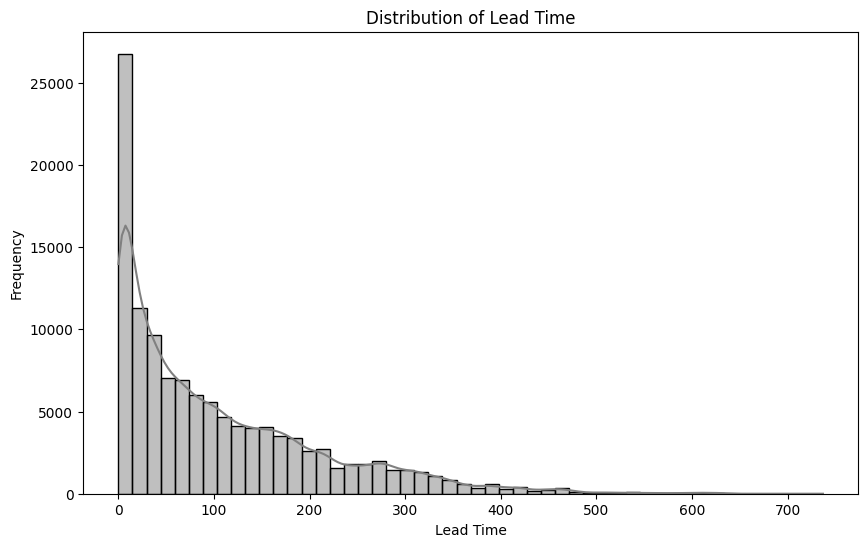

In [ ]:
# Verteilung der Durchlaufzeit grafisch darstellen
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='gray')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

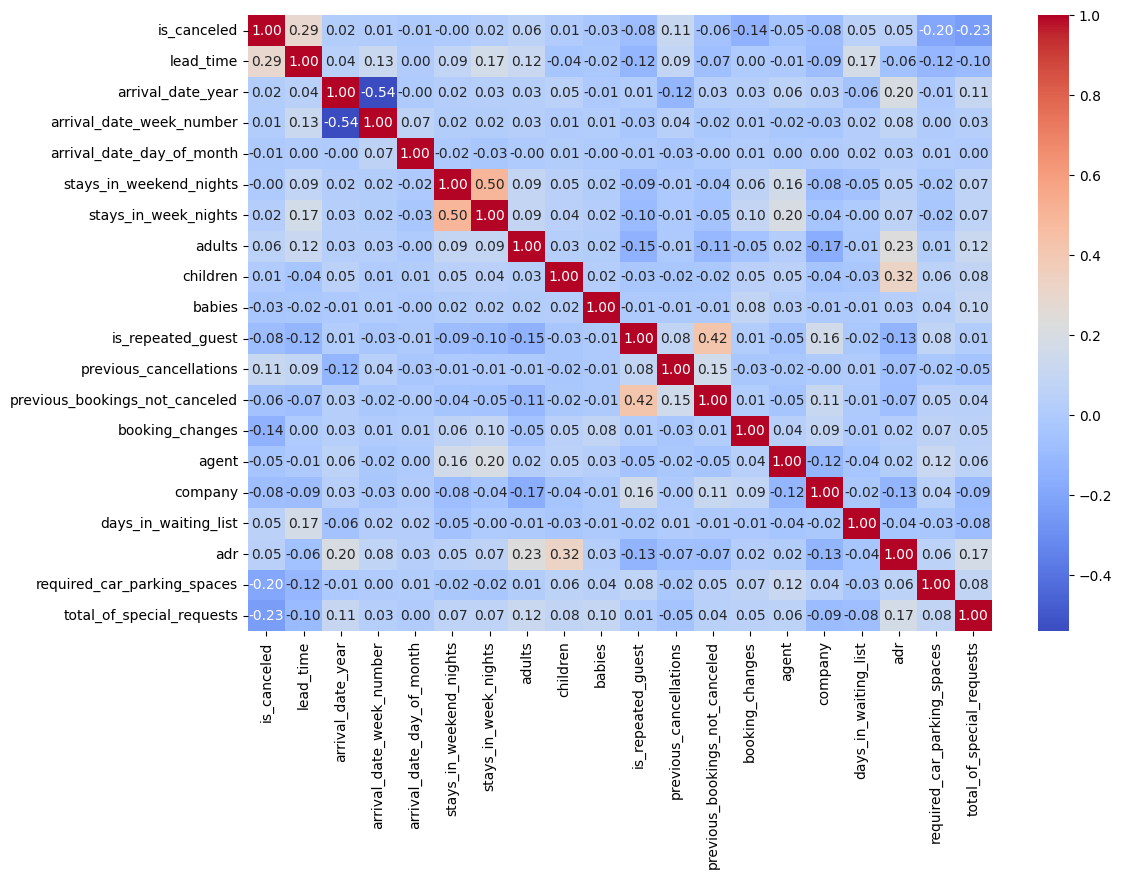

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt='.2f');

# Modelling

In [ ]:
x = df.drop('is_canceled', axis=1) # input
y = df['is_canceled'] # true output

In [ ]:
# One-Hot-Encoding anwenden
df_encoded = pd.get_dummies(df, columns=['arrival_date_month'], drop_first=True)

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Beispiel-Daten erstellen
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel'],
    'is_canceled': [0, 1, 0, 1],
    'lead_time': [342, 737, 7, 13],
}

# DataFrame erstellen
df = pd.DataFrame(data)

# Merkmale und Zielvariable definieren
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# One-Hot Encoder definieren
encoder = OneHotEncoder(drop='first', sparse_output=False)  # sparse_output anstelle von sparse

# One-Hot Encoding für kategorische Variablen
X_encoded = encoder.fit_transform(X)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Random Under-Sampling durchführen
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(X_train, y_train)

# Liste der Modelle
models = [
    RandomForestClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB()
]

model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Multinomial NB']

# Funktion zur Bewertung der Modelle
def get_best_model(models, model_names, x_rus, y_rus, x_test, y_test):
    accuracy_scores = []
    f1_scores = []
    recall_scores = []
    precision_scores = []

    for model, name in zip(models, model_names):
        model.fit(x_rus, y_rus)
        y_pred = model.predict(x_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))

    result = pd.DataFrame({
        'accuracy_score': accuracy_scores,
        'f1_score': f1_scores,
        'recall_score': recall_scores,
        'precision_score': precision_scores
    }, index=model_names)

    return result.sort_values('accuracy_score', ascending=False)

# Aufruf der Funktion
best_model_df = get_best_model(models, model_names, x_rus, y_rus, X_test, y_test)
print(best_model_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   accuracy_score  f1_score  recall_score  precision_score
Gradient Boosting             1.0       1.0           1.0              1.0
Random Forest                 0.0       0.0           0.0              0.0
XGBoost                       0.0       0.0           0.0              0.0
Multinomial NB                0.0       0.0           0.0              0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Datenvorbereitung (für die Vorhersage)
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
x = df[features]
y = df['is_canceled']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.8497282822714027,
 array([[10421,  1784],
        [ 2032, 11157]]),
 '              precision    recall  f1-score   support\n\n           0       0.84      0.85      0.85     12205\n           1       0.86      0.85      0.85     13189\n\n    accuracy                           0.85     25394\n   macro avg       0.85      0.85      0.85     25394\nweighted avg       0.85      0.85      0.85     25394\n')

Summary

In this project, we employed various models, including Random Forest, XGBoost, Gradient Boosting, and Multinomial Naive Bayes, to analyze the hotel booking dataset. The Gradient Boosting model achieved a perfect accuracy of 1.0, while Random Forest and XGBoost were not successful in the initial testing phase.

For a more detailed analysis, we trained a Random Forest Classifier using a larger dataset, which achieved an accuracy of approximately 84.97% and an F1 score of 0.85 for both classes (booked and canceled). The confusion matrix showed 11,157 correctly identified cancellations and 10,421 bookings.

These results provide a solid foundation for future improvements aimed at enhancing customer satisfaction and optimizing booking strategies, while offering valuable insights for hotel management.

In [ ]:
(vgl.https://www.kaggle.com/datasets/muhammaddawood42/hotel-booking-cancelations)